Lien du dataset : https://www.kaggle.com/datasets/kaggle/sf-salaries/data

## Import des librairies nécessaires

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lecture du dataset

In [7]:
df = pd.read_csv('Salaries.csv')

C:\Users\milan\AppData\Local\Temp\ipykernel_17024\2827120379.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Salaries.csv')


In [8]:
df.head() # Lecture des 5 premières lignes

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [9]:
df.tail() # Lecture des 5 dernières lignes

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [10]:
df.info() # Informations sur les colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [11]:
df.describe() # Description des données

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [12]:
df.shape # Nombre de lignes et de colonnes
print ("Le dataset contient {} lignes et {} colonnes".format(df.shape[0], df.shape[1])) # {} permet de remplacer par les valeurs de df.shape[0] et df.shape[1], .format() permet de formater la chaîne de caractères

Le dataset contient 148654 lignes et 13 colonnes


In [13]:
# df['Year'] = pd.to_datetime(df['Year'], format='%yyyy') # Conversion de la colonne 'Year' en datetime

In [14]:
# df.info() # Vérification de la conversion

### Suppression des doublons et des colonnes inutiles

In [15]:
df.columns # Liste des colonnes

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [16]:
df.head() # Lecture des 5 premières lignes

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [17]:
df.isnull().sum() # Nombre de valeurs manquantes par colonne

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [18]:
df = df.drop(['Id', 'Notes', 'Agency', 'Status'], axis=1) # Suppression des colonnes Id, Notes, Agency et Status (axis=1 pour supprimer des colonnes et axis=0 pour supprimer des lignes)
# On supprime la colonne Status car bien que les valeurs manquantes soient remplacées par 'NaN' (valeur nulle), il s'agit d'une colonne catégorielle et non numérique (PT : Part Time, FT : Full Time)

In [19]:
df.columns # Vérification de la suppression des colonnes

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [20]:
df.duplicated().sum() # Nombre de lignes dupliquées
print ("Le dataset contient {} lignes dupliquées".format(df.duplicated().sum()))

Le dataset contient 3 lignes dupliquées


In [21]:
df.drop_duplicates(inplace=True) # Suppression des lignes dupliquées (inplace=True pour modifier le dataframe)

In [22]:
df.shape # Regardons à nouveau le nombre de lignes et de colonnes
print ("Le dataset contient à présent {} lignes et {} colonnes".format(df.shape[0], df.shape[1]))

Le dataset contient à présent 148651 lignes et 9 colonnes


### Exploration du dataset

In [23]:
df.describe(include='all') # Description de toutes les colonnes

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148651,148651,148046.0,148651.0,148651.0,112492.0,148651.000000,148651.000000,148651.000000
unique,110811,2159,109900.0,66555.0,84968.0,99635.0,NaN,NaN,NaN
top,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,NaN,NaN,NaN
freq,13,7036,875.0,66103.0,35218.0,1053.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,74769.830909,93694.445667,2012.522613
std,NaN,NaN,NaN,NaN,NaN,NaN,50516.398338,62792.756431,1.117529
min,NaN,NaN,NaN,NaN,NaN,NaN,-618.130000,-618.130000,2011.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,36169.340000,44071.405000,2012.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,71427.220000,92406.010000,2013.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,105841.940000,132877.495000,2014.000000


In [24]:
for col in df.columns: # On compte le nombre de valeurs uniques pour chaque colonne
    unique_count = df[col].nunique()
    print ("{} contient {} valeurs uniques".format(col, unique_count)) # .nunique() permet de compter le nombre de valeurs uniques

EmployeeName contient 110811 valeurs uniques
JobTitle contient 2159 valeurs uniques
BasePay contient 109900 valeurs uniques
OvertimePay contient 66555 valeurs uniques
OtherPay contient 84968 valeurs uniques
Benefits contient 99635 valeurs uniques
TotalPay contient 138486 valeurs uniques
TotalPayBenefits contient 142098 valeurs uniques
Year contient 4 valeurs uniques


In [25]:
df['EmployeeName'].value_counts() # Comptage des valeurs uniques de la colonne 'EmployeeName'

EmployeeName
Kevin Lee                   13
Richard Lee                 11
Steven Lee                  11
William Wong                11
KEVIN LEE                    9
                            ..
Jeffrey Skover               1
Ken Dever                    1
Kevin Whitfield              1
Granville McCollough III     1
Joe Lopez                    1
Name: count, Length: 110811, dtype: int64

In [26]:
df['JobTitle'].nunique() # Nombre d'emplois uniques
print ("Il y a {} emplois uniques".format(df['JobTitle'].nunique()))

Il y a 2159 emplois uniques


In [27]:
df[df['JobTitle'].str.lower().str.contains('chief')] # Liste des employés ayant un emploi contenant le mot Chief
# Je précise que j'ai utilisé .str.lower() pour mettre en minuscule car il y a les mots Chief, chief, CHIEF

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011
6,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011
...,...,...,...,...,...,...,...,...,...
138011,Sharon C Jackson,Chief Deputy Adlt Probation Of,56660.18,0.00,0.00,566.61,56660.18,57226.79,2014
139620,Anita S Lee,Chief Clerk,38598.86,0.00,0.00,386.00,38598.86,38984.86,2014
139709,George D Vaughan,Chief Nursery Specialist,27319.47,483.90,0.00,10334.67,27803.37,38138.04,2014
140080,Patrick W Gillespie,Chief Preparator,24091.00,0.00,0.00,10176.77,24091.00,34267.77,2014


In [28]:
df[df['JobTitle'].str.lower().str.contains('manager')] # Liste des employés ayant un emploi contenant le mot Manager

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
83,EDWARD REISKIN,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,230827.12,0.0,0.0,NaN,230827.12,230827.12,2011
87,KEVIN BARRY,MANAGER VII,96814.36,0.0,133563.47,NaN,230377.83,230377.83,2011
95,MIVIC HIROSE,MANAGER VIII,215180.76,0.0,12000.0,NaN,227180.76,227180.76,2011
162,JULIE LABONTE,MANAGER VIII,207501.2,0.0,2903.37,NaN,210404.57,210404.57,2011
...,...,...,...,...,...,...,...,...,...
147216,Steven D Koneffklatt,Manager III,0.00,0.00,1890.72,342.03,1890.72,2232.75,2014
147502,Alice B Villagomez,Manager IV,1660.00,0.00,0.00,16.60,1660.00,1676.60,2014
147805,Stephen C Laplante,Manager II,0.00,0.00,982.62,177.76,982.62,1160.38,2014
148150,Shirley M Parker,Real Property Manager,0.00,0.00,647.76,0.00,647.76,647.76,2014


In [29]:
df['TotalPayBenefits'].mean() # Moyenne du salaire total
print ("Le salaire total moyen est de {}$".format(round(df['TotalPayBenefits'].mean(), 2))) # .mean() permet de calculer la moyenne

Le salaire total moyen est de 93694.45$


In [30]:
df['TotalPayBenefits'].median() # Médiane du salaire total
print ("Le salaire médian est de {}$".format(round(df['TotalPayBenefits'].median(), 2))) # .median() permet de calculer la médiane
# On remarque que la moyenne est supérieure à la médiane, cela signifie que la distribution est asymétrique positive. Donc que la majorité des salaires sont inférieurs à la moyenne (on pourra le vérifier avec un histogramme)

Le salaire médian est de 92406.01$


In [31]:
df['TotalPayBenefits'].min() # Salaire total minimum

-618.13

In [32]:
df['TotalPayBenefits'].max() # Salaire total maximum

567595.43

In [33]:
# Prenons le cas de JOSEPH DRISCOLL en 2011
# On peut voir que son emploi est CAPTAIN FIRE SUPPRESION
df[df['EmployeeName']== 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [34]:
# Son salaire total est de 270324.91$
df[df['EmployeeName']== 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [35]:
# L'année de son salaire est en 2011
df[df['EmployeeName']== 'JOSEPH DRISCOLL']['Year']

24    2011
Name: Year, dtype: int64

## Répondons à plusieurs questions

Palette de couleurs des graphiques

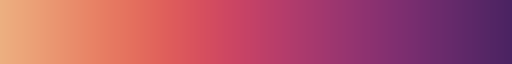

In [36]:
sns.color_palette("flare", as_cmap=True)

Quels sont les 10 emplois les plus fréquent ?


In [37]:
df['JobTitle'].value_counts().head(10)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: count, dtype: int64

C:\Users\milan\AppData\Local\Temp\ipykernel_17024\1710883025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nbJobTitle.index, y=nbJobTitle.values, palette="flare"), plt.xticks(rotation=90) # .barplot() permet de créer un graphique en barres et .xticks() permet de faire pivoter les noms des JobTitle à 90°


Text(0.5, 1.0, 'Les 10 Emplois les plus fréquents')

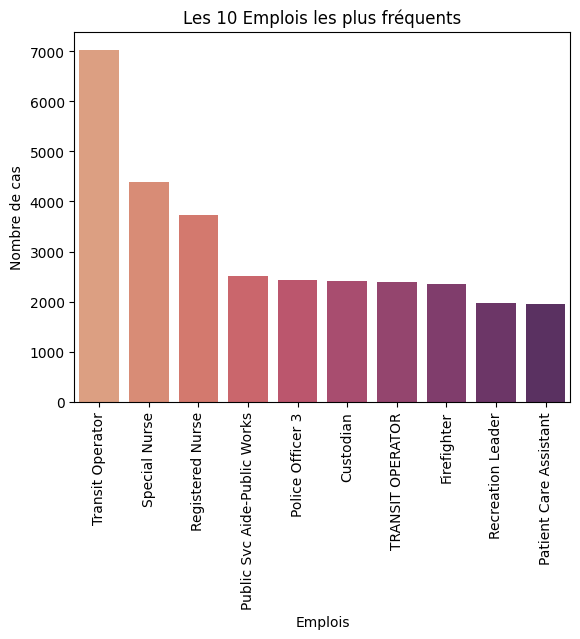

In [38]:
nbJobTitle = df['JobTitle'].value_counts()[:10] # On stocke les 10 emplois les plus fréquents dans une variable

sns.barplot(x=nbJobTitle.index, y=nbJobTitle.values, palette="flare"), plt.xticks(rotation=90) # .barplot() permet de créer un graphique en barres et .xticks() permet de faire pivoter les noms des JobTitle à 90°

plt.xlabel('Emplois')
plt.ylabel('Nombre de cas')
plt.title('Les 10 Emplois les plus fréquents')


Quelles sont les 10 personnes les mieux payées ?


In [39]:
df[['EmployeeName', 'TotalPayBenefits', 'JobTitle']].sort_values('TotalPayBenefits', ascending=False).head(10) # .sort_values() permet de trier les valeurs par ordre croissant ou décroissant (ascending=False pour décroissant)
# La personne la mieux payée est NATHANIEL FORD avec un salaire total de 567595.43$ et son emploi est GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY

,EmployeeName,TotalPayBenefits,JobTitle
0,NATHANIEL FORD,567595.43,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,GARY JIMENEZ,538909.28,CAPTAIN III (POLICE DEPARTMENT)
110531,David Shinn,510732.68,Deputy Chief 3
110532,Amy P Hart,479652.21,Asst Med Examiner
110533,William J Coaker Jr.,436224.36,Chief Investment Officer
72925,Gregory P Suhr,425815.28,Chief of Police
72926,Joanne M Hayes-White,422353.40,"Chief, Fire Department"
110534,Gregory P Suhr,418019.22,Chief of Police
110535,Joanne M Hayes-White,417435.10,"Chief, Fire Department"
110536,Ellen G Moffatt,415767.94,Asst Med Examiner


C:\Users\milan\AppData\Local\Temp\ipykernel_17024\747879636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nbPersonnesMieuxPayees['EmployeeName'], y=nbPersonnesMieuxPayees['TotalPayBenefits'], palette="flare"), plt.xticks(rotation=90)


Text(0.5, 1.0, 'Les 10 personnes les mieux payées')

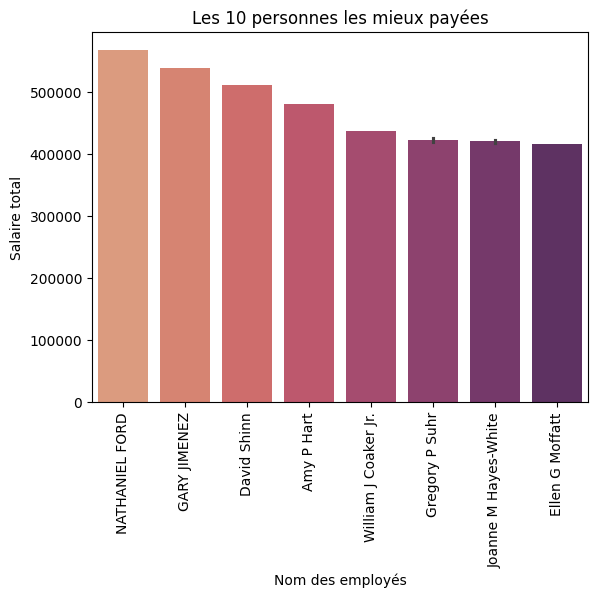

In [40]:
nbPersonnesMieuxPayees = df[['EmployeeName', 'TotalPayBenefits']].sort_values('TotalPayBenefits', ascending=False).head(10) # On stocke les 10 personnes les mieux payées dans une variable

sns.barplot(x=nbPersonnesMieuxPayees['EmployeeName'], y=nbPersonnesMieuxPayees['TotalPayBenefits'], palette="flare"), plt.xticks(rotation=90)

plt.xlabel('Nom des employés')
plt.ylabel('Salaire total')
plt.title('Les 10 personnes les mieux payées')

Quelles sont les 10 personnes les moins payées ?


In [41]:
df[['EmployeeName', 'TotalPayBenefits', 'JobTitle']].sort_values('TotalPayBenefits', ascending=True).head(10)
# La personne la moins bien payée est Joe Lopez avec un salaire total de -618.13$, son emploi est Counselor, Log Cabin Ranch
# Une des raisons pour laquelle son salaire est négatif est qu'il a remboursé de l'argent à la ville de San Francisco

,EmployeeName,TotalPayBenefits,JobTitle
148653,Joe Lopez,-618.13,"Counselor, Log Cabin Ranch"
110530,David P Kucia,-33.89,Police Officer 3
110529,Mark E Laherty,-8.20,Police Officer 3
110528,Timothy E Gibson,-2.73,Police Officer 3
36158,JOSEPHINE MCCREARY,0.00,MANAGER IV
36157,KAUKAB MOHSIN,0.00,TRANSIT OPERATOR
36156,PAULETTE ADAMS,0.00,"STATIONARY ENGINEER, WATER TREATMENT PLANT"
148626,Paulet Gaines,0.00,Account Clerk
148627,Brett A Lundberg,0.00,General Laborer
148628,Mark W Mcclure,0.00,General Laborer


In [42]:
# Combien de personnes sont employées chaque année ?
df['EmployeeName'].groupby(df['Year']).count()

Year
2011    36159
2012    36766
2013    37606
2014    38120
Name: EmployeeName, dtype: int64

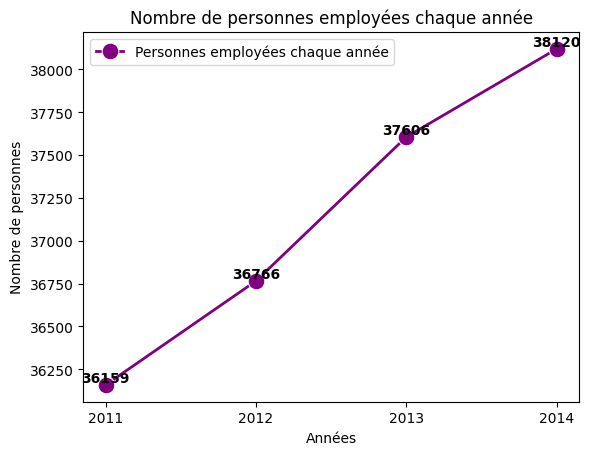

In [43]:
nbPersonnesEmployees = df['EmployeeName'].groupby(df['Year']).count() # On stocke le nombre de personnes employées chaque année dans une variable
anneeUniqueStr = df['Year'].unique().astype(str) # On stocke les années dans une variable et on convertit les années en chaîne de caractères avec .astype(str) (sinon on aurait eu 2011.0, 2011.5, 2012.0, 2012.5)

sns.lineplot(x=anneeUniqueStr, y=nbPersonnesEmployees.values, linewidth=2, marker='o', markersize=12, color='purple', label='Personnes employées chaque année', legend='brief') # .lineplot() permet de créer un graphique en ligne

plt.xlabel('Années')
plt.ylabel('Nombre de personnes')
plt.title('Nombre de personnes employées chaque année')

# On affiche le nombre de personnes au-dessus de chaque point
for i, v in enumerate(nbPersonnesEmployees.values): # enumerate() permet de parcourir une liste et de renvoyer à chaque itération un tuple contenant un compteur (i) et la valeur associée (v)
    plt.text(i, v, str(v), ha='center', va='bottom', color='black', fontweight='bold')
    # tuple : type de données qui permet de stocker plusieurs valeurs dans une seule variable (comme une liste mais non modifiable). Exemple : tuple = (1, 2, 3)
    # i correspond à la position de la barre, v correspond à la valeur de la barre par exemple (2011, 36159)
    # str(v) permet de convertir la valeur (36159) en chaîne de caractères, ha='center' permet de centrer le texte horizontalement, va='bottom' permet de centrer le texte verticalement
    # plt.text() contient donc les paramètres suivants : position horizontale, position verticale, texte, alignement horizontal, alignement vertical, couleur du texte, épaisseur du texte

On remarque une constante augmentation du nombre de personnes employées chaque année
Ceci peut être dû à une augmentation de la population de San Francisco ou à une augmentation des services de la ville (police, pompiers, etc.)

Quel est le salaire total moyen par année ?


In [44]:
df['TotalPayBenefits'].groupby(df['Year']).mean().round(2) # Affichage de la moyenne des salaires totaux par année (groupby() permet de grouper les données par année)

Year
2011     71744.10
2012    100553.23
2013    101440.52
2014    100258.81
Name: TotalPayBenefits, dtype: float64

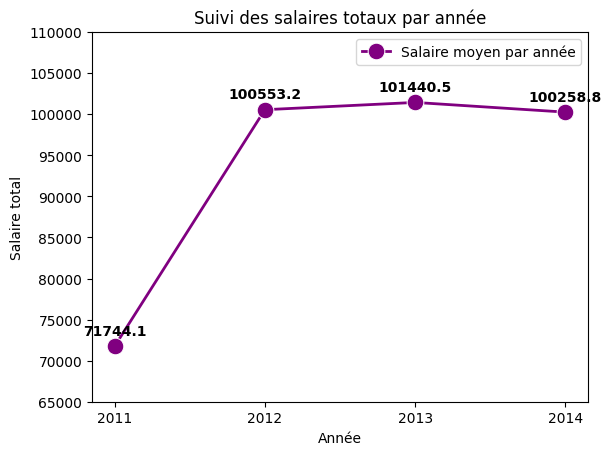

In [45]:
salaireMoyenParAnnee = df['TotalPayBenefits'].groupby(df['Year']).mean() # On stocke les données dans une variable

sns.lineplot(x=anneeUniqueStr, y=salaireMoyenParAnnee.values, marker='o', linewidth=2, markersize=12, color='purple', label='Salaire moyen par année', legend='brief')

plt.xlabel('Année')
plt.ylabel('Salaire total')
plt.title('Suivi des salaires totaux par année')
plt.ylim(65000, 110000) # .ylim() permet de définir les limites de l'axe des ordonnées

# Ajout du salaire moyen au-dessus de chaque point
for i, v in enumerate(salaireMoyenParAnnee.values): # enumerate() permet de parcourir une liste et de renvoyer à chaque itération un tuple contenant un compteur (i) et la valeur associée (v)
    plt.text(i, v + 1000, str(round(v, 1)), ha='center', va='bottom', color='black', fontweight='bold')
    # tuple : type de données qui permet de stocker plusieurs valeurs dans une seule variable (comme une liste mais non modifiable). Exemple : tuple = (1, 2, 3)
    # i correspond à la position de la barre, v correspond à la valeur de la barre par exemple (2011, 71744.10)
    # str(v) permet de convertir la valeur (71744.10) en chaîne de caractères

On peut voir que le salaire total moyen a augmenté entre 2011 et 2013 puis a légèrement diminué entre 2013 et 2014.
On pourrait expliquer cette diminution par le fait que la ville de San Francisco ait embauché plus de personnes en 2014

Quel est le taux de croissance du salaire total moyen par année


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


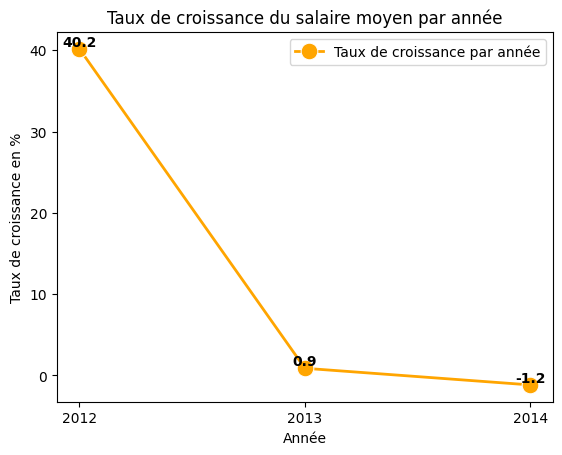

In [46]:
tauxDeCroissance = salaireMoyenParAnnee.pct_change() * 100 # .pct_change() permet de calculer le taux de croissance et on multiplie par 100 pour avoir le taux de croissance en pourcentage
# 2012 : (100553.23 - 71744.10) / 71744.10 * 100 = 40
# 2013 : (101440.52 - 100553.23) / 100553.23 * 100 = 0.88
# 2014 : (100258.81 - 101440.52) / 101440.52 * 100 = -1.16

# La raison pour laquelle le taux de croissance de 2011 est de 0 est que l'année précédente n'existe pas (2010) donc on ne peut pas calculer le taux de croissance de 2011 par rapport à 2010

sns.lineplot(x=anneeUniqueStr, y=tauxDeCroissance, marker='o', linewidth=2, markersize=12, label='Taux de croissance par année', color='orange', legend='brief')

plt.xlabel('Année')
plt.ylabel('Taux de croissance en %')
plt.title('Taux de croissance du salaire moyen par année')

# Ajout du taux de croissance au-dessus de chaque point
for i, v in enumerate(tauxDeCroissance):
    plt.text(i, v, str(round(v, 1)), ha='center', va='bottom', color='black', fontweight='bold')

On peut voir le taux de croissance à diminuer au fil des années. Cela peux s'expliquer par le fait que la ville de San Francisco ait embauché plus de personnes en 2014. On peut aussi expliquer cela par le fait que les employés ont eu une augmentation de salaire moins importante en 2014

Combien y a-t-il d'assistant par année ?


In [47]:
df['JobTitle'].str.lower().str.contains('assistant').groupby(df['Year']).sum() # Affichage du nombre d'assistant par année

Year
2011    1683
2012    1829
2013    1968
2014    1964
Name: JobTitle, dtype: int64

Combien y a-t-il de capitaine par année ?


In [48]:
df['JobTitle'].str.lower().str.contains('captain').groupby(df['Year']).sum() # Affichage du nombre de capitaine par année

Year
2011    141
2012    138
2013    132
2014    141
Name: JobTitle, dtype: int64

Quelles sont les 10 emplois les mieux payés en moyenne ?


In [49]:
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
# On convertit la colonne BasePay en numérique et on remplace les valeurs non numériques par NaN (errors='coerce') car il y a des valeurs non numériques dans la colonne BasePay

df[['JobTitle', 'BasePay']].groupby('JobTitle').mean().sort_values('BasePay', ascending=False).head(10)

,BasePay
JobTitle,
Chief of Police,309767.683333
"Chief, Fire Department",304232.340000
"Gen Mgr, Public Trnsp Dept",297769.413333
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.000000
"Dep Dir for Investments, Ret",276153.765000
Mayor,275852.530000
"Adm, SFGH Medical Center",265218.780000
EXECUTIVE CONTRACT EMPLOYEE,264452.520000
Controller,263588.753333


C:\Users\milan\AppData\Local\Temp\ipykernel_17024\4264263256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10BestJobTitle.index, y=top10BestJobTitle['BasePay'], palette='flare'), plt.xticks(rotation=90)


Text(0.5, 1.0, 'Les 10 Emplois qui rapportent le plus')

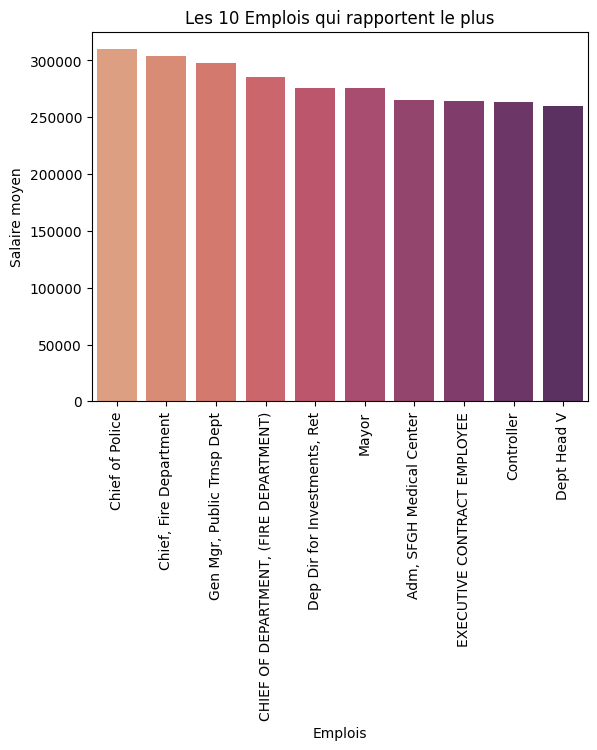

In [50]:
top10BestJobTitle = df[['JobTitle', 'BasePay']].groupby('JobTitle').mean().sort_values('BasePay', ascending=False).head(10) # On stocke les 10 emplois les mieux payés en moyenne dans une variable

sns.barplot(x=top10BestJobTitle.index, y=top10BestJobTitle['BasePay'], palette='flare'), plt.xticks(rotation=90)

plt.xlabel('Emplois')
plt.ylabel('Salaire moyen')
plt.title('Les 10 Emplois qui rapportent le plus')

On remarque que les emplois qui rapportent le plus sont des emplois de médecins ou de directeurs (Chief Investment Officer, Chief of Police, Chief, Fire Department, etc.)

Quels sont les 10 emplois qui rapportent le moins ?


In [51]:
df[['JobTitle', 'BasePay']].groupby('JobTitle').mean().sort_values('BasePay', ascending=True).head(10)
# On peut voir qu'il y a des JobTitle qui rapportent 0$

,BasePay
JobTitle,
Assistant Recreation Director,0.000000
WAREHOUSE WORKER,0.000000
ASSISTANT RECREATION SUPERVISOR,0.000000
Recreation Director,0.000000
RECREATION DIRECTOR,0.000000
Conversion,0.000000
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN,0.000000
Cashier 3,0.000000
"BdComm Mbr, Grp2,M=$25/Mtg",270.305785


In [52]:
# Pour obtenir des résultats plus intéressant, on ne va pas afficher les emplois qui rapportent 0$
df[df['BasePay'] != 0][['JobTitle', 'BasePay']].groupby('JobTitle').mean().sort_values('BasePay', ascending=True).head(10)
# Le JobTitle qui rapporte à présent le moins est BdComm Mbr, Grp2,M=$25/Mtg avec un salaire de base de 270.31$
# BdComm Mbr, Grp2,M=$25/Mtg est un membre du conseil d'administration de la ville de San Francisco (Board of Supervisors)

,BasePay
JobTitle,
"BdComm Mbr, Grp2,M=$25/Mtg",270.305785
"BOARD/COMMISSION MEMBER, GROUP II",296.511628
"BOARD/COMMISSION MEMBER, GROUP III",638.787879
SPECIAL ASSISTANT XIV,673.800000
"BdComm Mbr, Grp3,M=$50/Mtg",731.937500
"BOARD/COMMISSION MEMBER, GROUP V",1183.561607
SPECIAL EXAMINER,1191.382000
"BdComm Mbr, Grp5,M$100/Mo",1216.390602
"Commissioner 16.700c, No Pay",1288.000000


C:\Users\milan\AppData\Local\Temp\ipykernel_17024\4108115896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10LessJobTitle.index, y=top10LessJobTitle['BasePay'], palette="flare"), plt.xticks(rotation=90)


Text(0.5, 1.0, 'Les 10 Emplois qui rapportent le moins')

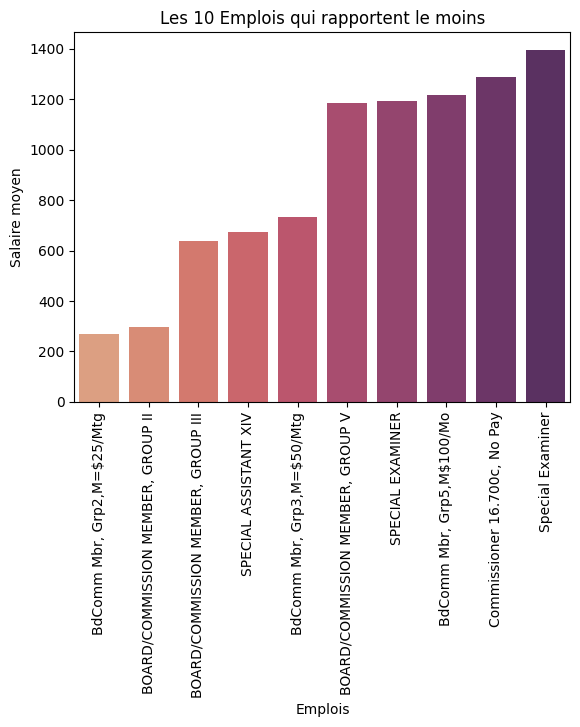

In [53]:
top10LessJobTitle = df[df['BasePay'] != 0][['JobTitle', 'BasePay']].groupby('JobTitle').mean().sort_values('BasePay', ascending=True).head(10) # On stocke les 10 emplois les moins bien payés en moyenne dans une variable

sns.barplot(x=top10LessJobTitle.index, y=top10LessJobTitle['BasePay'], palette="flare"), plt.xticks(rotation=90)

plt.xlabel('Emplois')
plt.ylabel('Salaire moyen')
plt.title('Les 10 Emplois qui rapportent le moins')

On remarque que les emplois qui rapportent le moins sont des emplois de membres du conseil d'administration de la ville de San Francisco (Board of Supervisors) ou des emplois de conseillers (Counselor, Log Cabin Ranch, Counselor, Juvenile Hall, etc.)

In [62]:
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce') # Conversion de la colonne OvertimePay en numérique, errors='coerce' permet de remplacer les valeurs non numériques par NaN.
# On a converti la colonne OvertimePay en numérique car on elle contient des valeurs non numériques
df['OvertimePay'].fillna(0, inplace=True) # Remplacement des valeurs NaN par 0

Les personnes ayant les plus bas salaires font-elles plus d'heures supplémentaires que les personnes ayant les plus hauts salaires ?


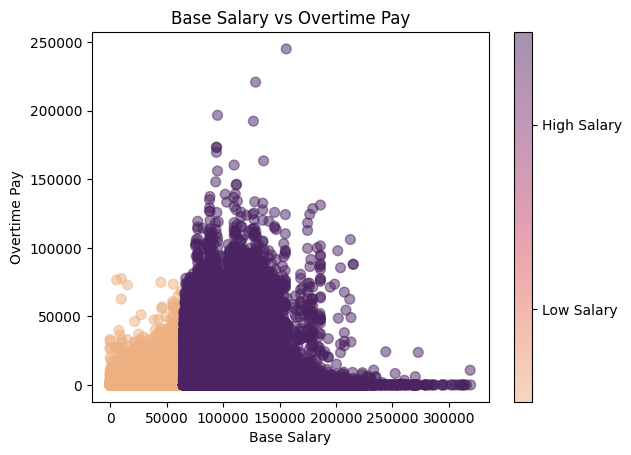

In [63]:
# Crée un sous-ensemble du dataframe avec les colonnes 'BasePay' et 'OvertimePay'
df_subset = df[['BasePay', 'OvertimePay']]

# Supprime les lignes avec des valeurs manquantes
df_subset = df_subset.dropna()

# Trie le sous-ensemble par salaire de base (BasePay)
df_subset = df_subset.sort_values('BasePay')

# Crée une colonne pour indiquer si le salaire est bas ou haut
df_subset['SalaryLevel'] = pd.qcut(df_subset['BasePay'], q=2, labels=['Low', 'High'])
# pd.qcut() permet de découper les données en quantiles (q=2 pour 2 quantiles) et labels permet de renommer les quantiles

# Crée un nuage de points avec une couleur différente pour chaque niveau de salaire
plt.scatter(df_subset['BasePay'], df_subset['OvertimePay'], c=df_subset['SalaryLevel'].cat.codes, cmap='flare', alpha=0.5, s=50)
# .cat.codes permet de convertir les catégories en codes numériques
# c='SalaryLevel' permet de colorer les points en fonction du niveau de salaire

# Set the labels and title
plt.xlabel('Base Salary')
plt.ylabel('Overtime Pay')
plt.title('Base Salary vs Overtime Pay')

# Ajoute une légende
cbar = plt.colorbar()
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['Low Salary', 'High Salary'])

# Affiche le graphique
plt.show()

On peut voir que les personnes ayant les plus bas salaires font plus d'heures supplémentaires que les personnes ayant les plus hauts salaires
Cela peut s'expliquer par le fait que les personnes ayant les plus bas salaires ont besoin d'argent supplémentaire pour vivre

Comparons à présent les heures supp en fonction du salaire de base pour chaque année (2011, 2012, 2013 et 2014) pour voir si le comportement est le même chaque année ou non ?


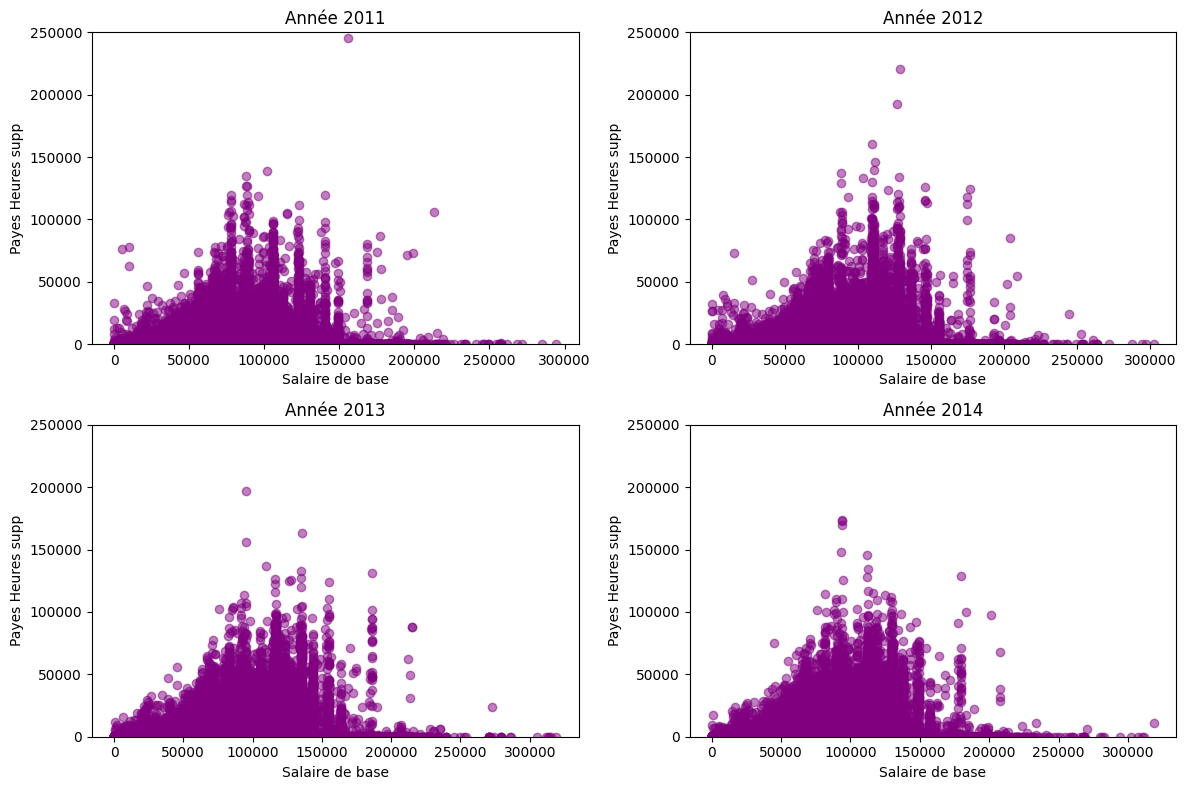

In [64]:
# Crée un graphique avec 4 sous-graphiques (2 lignes et 2 colonnes) pour comparer les heures supp en fonction du salaire de base pour chaque année
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8)) # subplots() permet de créer plusieurs sous-graphiques et figsize() permet de définir la taille du graphique en pouces.

# Plot for Year 2011
axes[0, 0].scatter(df[df['Year'] == 2011]['BasePay'], df[df['Year'] == 2011]['OvertimePay'], alpha=0.5, color='purple') # axes[0, 0] correspond au premier sous-graphique (en haut à gauche). On sélectionne les données pour l'année 2011
axes[0, 0].set_xlabel('Salaire de base')
axes[0, 0].set_ylabel('Payes Heures supp')
axes[0, 0].set_title('Année 2011')

axes[0, 0].set_ylim(0, 250000) # .set_ylim() permet de définir les limites de l'axe des ordonnées

# Plot for Year 2012
axes[0, 1].scatter(df[df['Year'] == 2012]['BasePay'], df[df['Year'] == 2012]['OvertimePay'], alpha=0.5, color='purple')
axes[0, 1].set_xlabel('Salaire de base')
axes[0, 1].set_ylabel('Payes Heures supp')
axes[0, 1].set_title('Année 2012')

axes[0, 1].set_ylim(0, 250000) # .set_ylim() permet de définir les limites de l'axe des ordonnées

# Plot for Year 2013
axes[1, 0].scatter(df[df['Year'] == 2013]['BasePay'], df[df['Year'] == 2013]['OvertimePay'], alpha=0.5, color='purple')
axes[1, 0].set_xlabel('Salaire de base')
axes[1, 0].set_ylabel('Payes Heures supp')
axes[1, 0].set_title('Année 2013')

axes[1, 0].set_ylim(0, 250000) # .set_ylim() permet de définir les limites de l'axe des ordonnées

# Plot for Year 2014
axes[1, 1].scatter(df[df['Year'] == 2014]['BasePay'], df[df['Year'] == 2014]['OvertimePay'], alpha=0.5, color='purple')
axes[1, 1].set_xlabel('Salaire de base')
axes[1, 1].set_ylabel('Payes Heures supp')
axes[1, 1].set_title('Année 2014')

axes[1, 1].set_ylim(0, 250000) # .set_ylim() permet de définir les limites de l'axe des ordonnées

plt.tight_layout() # .tight_layout() permet d'ajuster les sous-graphiques pour qu'ils ne se chevauchent pas

plt.show() # Affiche le graphique


On peut voir que le comportement est plus ou moins le même chaque année :
- Les personnes ayant les plus bas salaires font plus d'heures supp que les personnes ayant les plus hauts salaires
- En 2012, on remarque une croissance linéaire entre les heures supp et le salaire de base
- En 2013, il y a une diminution des heures supp par rapport à 2012

En somme, les personnes ayant un salaire entre 0 et 175000$ font plus d'heures supp que les personnes ayant un salaire entre 175000$ et 300000$


Quel le coefficient de corrélation entre le salaire de base et les heures supp ?


In [56]:
df['BasePay'].corr(df['OvertimePay']) # .corr() permet de calculer le coefficient de corrélation



0.26673984899677433

Text(0.5, 1.0, 'Coefficient de corrélation entre le salaire de base et les heures supp')

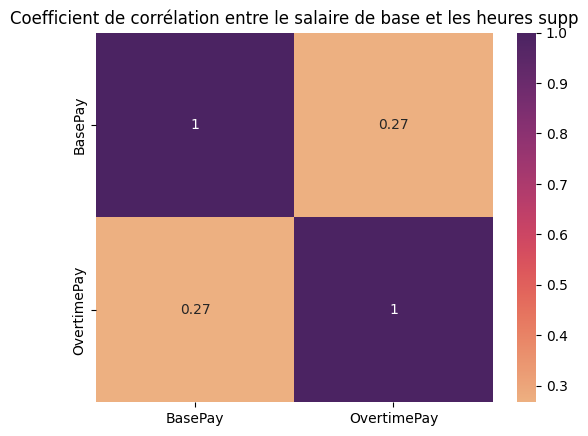

In [57]:
sns.heatmap(df[['BasePay', 'OvertimePay']].corr(), annot=True, cmap='flare') # annot=True permet d'afficher les valeurs dans les cases

plt.title('Coefficient de corrélation entre le salaire de base et les heures supp')

On peut voir que le coefficient de corrélation est d'environ 0.3, il y a donc une corrélation positive entre le salaire de base et les heures supplémentaires.

Plus le salaire de base est faible, plus les heures supp sont élevées.